## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
!pip install tensorflow

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

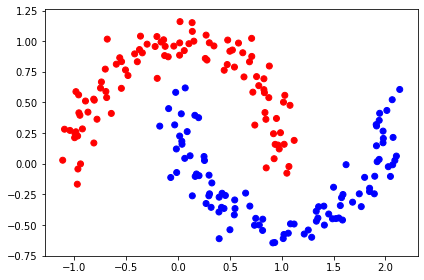

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors
import warnings
warnings.filterwarnings("ignore")

X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [5]:
# Relevant imports
from tensorflow.keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from tensorflow.keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

In [6]:

#Let's first create neural network with 1 layer 
# To add a layer to the architecture, you would simply use .add(LAYER).
# Each "input_dim" of each layer should be the number units in the previous layer 
# (in this case the input), and the number of "units" should be the number of 
# outputs of the layer (in this case it will be 1).

#Write your code here: (2 lines)
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=2, activation='sigmoid'))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [7]:
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)

In [8]:
#Now we train the built perceptron
#Write your code here: (1 line)
perceptron.fit(X_train, y_train, epochs=250, batch_size=10)

Train on 160 samples
Epoch 1/250
160/160 [==============================] - 1s 6ms/sample - loss: 0.6085
Epoch 2/250
160/160 [==============================] - 0s 222us/sample - loss: 0.6012
Epoch 3/250
160/160 [==============================] - 0s 218us/sample - loss: 0.5925
Epoch 4/250
160/160 [==============================] - 0s 218us/sample - loss: 0.5837
Epoch 5/250
160/160 [==============================] - 0s 226us/sample - loss: 0.5753
Epoch 6/250
160/160 [==============================] - 0s 217us/sample - loss: 0.5674
Epoch 7/250
160/160 [==============================] - 0s 276us/sample - loss: 0.5599
Epoch 8/250
160/160 [==============================] - 0s 407us/sample - loss: 0.5521
Epoch 9/250
160/160 [==============================] - 0s 469us/sample - loss: 0.5452
Epoch 10/250
160/160 [==============================] - 0s 470us/sample - loss: 0.5384
Epoch 11/250
160/160 [==============================] - 0s 411us/sample - loss: 0.5317
Epoch 12/250
160/160 [===========

160/160 [==============================] - 0s 419us/sample - loss: 0.3415
Epoch 95/250
160/160 [==============================] - 0s 406us/sample - loss: 0.3407
Epoch 96/250
160/160 [==============================] - 0s 419us/sample - loss: 0.3399
Epoch 97/250
160/160 [==============================] - 0s 467us/sample - loss: 0.3391
Epoch 98/250
160/160 [==============================] - 0s 416us/sample - loss: 0.3383
Epoch 99/250
160/160 [==============================] - 0s 476us/sample - loss: 0.3375
Epoch 100/250
160/160 [==============================] - 0s 443us/sample - loss: 0.3368
Epoch 101/250
160/160 [==============================] - 0s 425us/sample - loss: 0.3360
Epoch 102/250
160/160 [==============================] - 0s 430us/sample - loss: 0.3352
Epoch 103/250
160/160 [==============================] - 0s 362us/sample - loss: 0.3345
Epoch 104/250
160/160 [==============================] - 0s 333us/sample - loss: 0.3338
Epoch 105/250
160/160 [============================

160/160 [==============================] - 0s 440us/sample - loss: 0.2946
Epoch 188/250
160/160 [==============================] - 0s 342us/sample - loss: 0.2943
Epoch 189/250
160/160 [==============================] - 0s 363us/sample - loss: 0.2940
Epoch 190/250
160/160 [==============================] - 0s 362us/sample - loss: 0.2937
Epoch 191/250
160/160 [==============================] - 0s 393us/sample - loss: 0.2933
Epoch 192/250
160/160 [==============================] - 0s 457us/sample - loss: 0.2931
Epoch 193/250
160/160 [==============================] - 0s 422us/sample - loss: 0.2928
Epoch 194/250
160/160 [==============================] - 0s 445us/sample - loss: 0.2925
Epoch 195/250
160/160 [==============================] - 0s 418us/sample - loss: 0.2922
Epoch 196/250
160/160 [==============================] - 0s 406us/sample - loss: 0.2919
Epoch 197/250
160/160 [==============================] - 0s 346us/sample - loss: 0.2916
Epoch 198/250
160/160 [=======================

In [9]:
from utils import get_accuracy

In [10]:
# And test it on training and test set 
get_accuracy(perceptron, X_test, y_test)

0.75

Text(18.75, 0.5, 'Test')

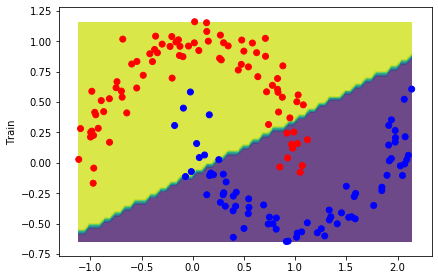

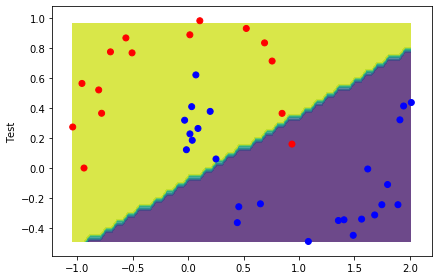

In [11]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the first exercise, use Keras to create a 2 layer neural network by completing build_one_output_model() in exercise_3.py. Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [12]:
from exercise_3 import build_one_output_model
model = build_one_output_model()

In [13]:
model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
get_accuracy(model, X_test, y_test)

0.8

Text(18.75, 0.5, 'Test')

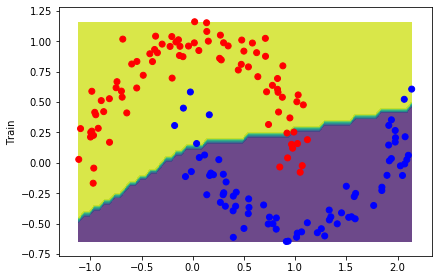

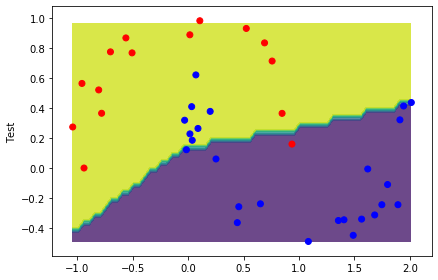

In [14]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is your number of outputs. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [15]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [16]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Implement build_classification_model() in exercise_3.py that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [17]:
from exercise_3 import build_classification_model

In [18]:
model = build_classification_model()

Use the below calls to test your implementation

In [19]:
model.fit(X_train, y_train_vectorized, epochs=1000, batch_size=10, verbose = 1)

Train on 160 samples
Epoch 1/1000
160/160 [==============================] - 1s 4ms/sample - loss: 0.6464 - accuracy: 0.7312
Epoch 2/1000
160/160 [==============================] - 0s 244us/sample - loss: 0.6406 - accuracy: 0.8062
Epoch 3/1000
160/160 [==============================] - 0s 259us/sample - loss: 0.6325 - accuracy: 0.8000
Epoch 4/1000
160/160 [==============================] - 0s 263us/sample - loss: 0.6231 - accuracy: 0.8125
Epoch 5/1000
160/160 [==============================] - 0s 252us/sample - loss: 0.6136 - accuracy: 0.8188
Epoch 6/1000
160/160 [==============================] - 0s 237us/sample - loss: 0.6023 - accuracy: 0.8250
Epoch 7/1000
160/160 [==============================] - 0s 262us/sample - loss: 0.5909 - accuracy: 0.8313
Epoch 8/1000
160/160 [==============================] - 0s 250us/sample - loss: 0.5799 - accuracy: 0.8313
Epoch 9/1000
160/160 [==============================] - 0s 497us/sample - loss: 0.5677 - accuracy: 0.8313
Epoch 10/1000
160/160 [====

160/160 [==============================] - 0s 511us/sample - loss: 0.2413 - accuracy: 0.9000
Epoch 78/1000
160/160 [==============================] - 0s 482us/sample - loss: 0.2412 - accuracy: 0.8938
Epoch 79/1000
160/160 [==============================] - 0s 520us/sample - loss: 0.2404 - accuracy: 0.8938
Epoch 80/1000
160/160 [==============================] - 0s 432us/sample - loss: 0.2405 - accuracy: 0.9062
Epoch 81/1000
160/160 [==============================] - 0s 480us/sample - loss: 0.2398 - accuracy: 0.9062
Epoch 82/1000
160/160 [==============================] - 0s 436us/sample - loss: 0.2399 - accuracy: 0.8938
Epoch 83/1000
160/160 [==============================] - 0s 523us/sample - loss: 0.2381 - accuracy: 0.8938
Epoch 84/1000
160/160 [==============================] - 0s 513us/sample - loss: 0.2380 - accuracy: 0.9000
Epoch 85/1000
160/160 [==============================] - 0s 449us/sample - loss: 0.2367 - accuracy: 0.9062
Epoch 86/1000
160/160 [============================

160/160 [==============================] - 0s 251us/sample - loss: 0.2203 - accuracy: 0.9062
Epoch 154/1000
160/160 [==============================] - 0s 250us/sample - loss: 0.2204 - accuracy: 0.9062
Epoch 155/1000
160/160 [==============================] - 0s 250us/sample - loss: 0.2201 - accuracy: 0.9062
Epoch 156/1000
160/160 [==============================] - 0s 263us/sample - loss: 0.2211 - accuracy: 0.9062
Epoch 157/1000
160/160 [==============================] - 0s 262us/sample - loss: 0.2195 - accuracy: 0.9062
Epoch 158/1000
160/160 [==============================] - 0s 264us/sample - loss: 0.2195 - accuracy: 0.9062
Epoch 159/1000
160/160 [==============================] - 0s 308us/sample - loss: 0.2190 - accuracy: 0.9062
Epoch 160/1000
160/160 [==============================] - 0s 312us/sample - loss: 0.2190 - accuracy: 0.9062
Epoch 161/1000
160/160 [==============================] - 0s 288us/sample - loss: 0.2191 - accuracy: 0.9062
Epoch 162/1000
160/160 [===================

Epoch 229/1000
160/160 [==============================] - 0s 467us/sample - loss: 0.2012 - accuracy: 0.9125
Epoch 230/1000
160/160 [==============================] - 0s 457us/sample - loss: 0.2005 - accuracy: 0.9062
Epoch 231/1000
160/160 [==============================] - 0s 443us/sample - loss: 0.2000 - accuracy: 0.9125
Epoch 232/1000
160/160 [==============================] - 0s 427us/sample - loss: 0.1999 - accuracy: 0.9125
Epoch 233/1000
160/160 [==============================] - 0s 494us/sample - loss: 0.2012 - accuracy: 0.9125
Epoch 234/1000
160/160 [==============================] - 0s 455us/sample - loss: 0.2016 - accuracy: 0.9125
Epoch 235/1000
160/160 [==============================] - 0s 435us/sample - loss: 0.1982 - accuracy: 0.9125
Epoch 236/1000
160/160 [==============================] - 0s 420us/sample - loss: 0.2017 - accuracy: 0.9125
Epoch 237/1000
160/160 [==============================] - 0s 467us/sample - loss: 0.1965 - accuracy: 0.9125
Epoch 238/1000
160/160 [====

160/160 [==============================] - 0s 476us/sample - loss: 0.1440 - accuracy: 0.9375
Epoch 305/1000
160/160 [==============================] - 0s 438us/sample - loss: 0.1433 - accuracy: 0.9375
Epoch 306/1000
160/160 [==============================] - 0s 448us/sample - loss: 0.1416 - accuracy: 0.9375
Epoch 307/1000
160/160 [==============================] - 0s 438us/sample - loss: 0.1413 - accuracy: 0.9375
Epoch 308/1000
160/160 [==============================] - 0s 450us/sample - loss: 0.1405 - accuracy: 0.9375
Epoch 309/1000
160/160 [==============================] - 0s 450us/sample - loss: 0.1389 - accuracy: 0.9375
Epoch 310/1000
160/160 [==============================] - 0s 452us/sample - loss: 0.1376 - accuracy: 0.9375
Epoch 311/1000
160/160 [==============================] - 0s 432us/sample - loss: 0.1367 - accuracy: 0.9438
Epoch 312/1000
160/160 [==============================] - 0s 417us/sample - loss: 0.1377 - accuracy: 0.9375
Epoch 313/1000
160/160 [===================

Epoch 380/1000
160/160 [==============================] - 0s 438us/sample - loss: 0.0781 - accuracy: 0.9750
Epoch 381/1000
160/160 [==============================] - 0s 418us/sample - loss: 0.0777 - accuracy: 0.9750
Epoch 382/1000
160/160 [==============================] - 0s 428us/sample - loss: 0.0768 - accuracy: 0.9750
Epoch 383/1000
160/160 [==============================] - 0s 413us/sample - loss: 0.0769 - accuracy: 0.9750
Epoch 384/1000
160/160 [==============================] - 0s 466us/sample - loss: 0.0754 - accuracy: 0.9750
Epoch 385/1000
160/160 [==============================] - 0s 425us/sample - loss: 0.0747 - accuracy: 0.9750
Epoch 386/1000
160/160 [==============================] - 0s 421us/sample - loss: 0.0741 - accuracy: 0.9750
Epoch 387/1000
160/160 [==============================] - 0s 434us/sample - loss: 0.0742 - accuracy: 0.9750
Epoch 388/1000
160/160 [==============================] - 0s 507us/sample - loss: 0.0737 - accuracy: 0.9750
Epoch 389/1000
160/160 [====

160/160 [==============================] - 0s 470us/sample - loss: 0.0414 - accuracy: 1.0000
Epoch 456/1000
160/160 [==============================] - 0s 443us/sample - loss: 0.0411 - accuracy: 1.0000
Epoch 457/1000
160/160 [==============================] - 0s 490us/sample - loss: 0.0404 - accuracy: 1.0000
Epoch 458/1000
160/160 [==============================] - 0s 461us/sample - loss: 0.0404 - accuracy: 1.0000
Epoch 459/1000
160/160 [==============================] - 0s 460us/sample - loss: 0.0402 - accuracy: 1.0000
Epoch 460/1000
160/160 [==============================] - 0s 423us/sample - loss: 0.0401 - accuracy: 1.0000
Epoch 461/1000
160/160 [==============================] - 0s 465us/sample - loss: 0.0392 - accuracy: 1.0000
Epoch 462/1000
160/160 [==============================] - 0s 422us/sample - loss: 0.0388 - accuracy: 1.0000
Epoch 463/1000
160/160 [==============================] - 0s 432us/sample - loss: 0.0385 - accuracy: 1.0000
Epoch 464/1000
160/160 [===================

Epoch 531/1000
160/160 [==============================] - 0s 496us/sample - loss: 0.0244 - accuracy: 1.0000
Epoch 532/1000
160/160 [==============================] - 0s 456us/sample - loss: 0.0242 - accuracy: 1.0000
Epoch 533/1000
160/160 [==============================] - 0s 421us/sample - loss: 0.0241 - accuracy: 1.0000
Epoch 534/1000
160/160 [==============================] - 0s 518us/sample - loss: 0.0238 - accuracy: 1.0000
Epoch 535/1000
160/160 [==============================] - 0s 412us/sample - loss: 0.0237 - accuracy: 1.0000
Epoch 536/1000
160/160 [==============================] - 0s 353us/sample - loss: 0.0236 - accuracy: 1.0000
Epoch 537/1000
160/160 [==============================] - 0s 151us/sample - loss: 0.0237 - accuracy: 1.0000
Epoch 538/1000
160/160 [==============================] - 0s 199us/sample - loss: 0.0235 - accuracy: 1.0000
Epoch 539/1000
160/160 [==============================] - 0s 261us/sample - loss: 0.0233 - accuracy: 1.0000
Epoch 540/1000
160/160 [====

160/160 [==============================] - 0s 293us/sample - loss: 0.0165 - accuracy: 1.0000
Epoch 607/1000
160/160 [==============================] - 0s 282us/sample - loss: 0.0165 - accuracy: 1.0000
Epoch 608/1000
160/160 [==============================] - 0s 241us/sample - loss: 0.0163 - accuracy: 1.0000
Epoch 609/1000
160/160 [==============================] - 0s 301us/sample - loss: 0.0162 - accuracy: 1.0000
Epoch 610/1000
160/160 [==============================] - 0s 288us/sample - loss: 0.0161 - accuracy: 1.0000
Epoch 611/1000
160/160 [==============================] - 0s 269us/sample - loss: 0.0161 - accuracy: 1.0000
Epoch 612/1000
160/160 [==============================] - 0s 284us/sample - loss: 0.0160 - accuracy: 1.0000
Epoch 613/1000
160/160 [==============================] - 0s 281us/sample - loss: 0.0161 - accuracy: 1.0000
Epoch 614/1000
160/160 [==============================] - 0s 261us/sample - loss: 0.0160 - accuracy: 1.0000
Epoch 615/1000
160/160 [===================

160/160 [==============================] - 0s 170us/sample - loss: 0.0122 - accuracy: 1.0000
Epoch 682/1000
160/160 [==============================] - 0s 162us/sample - loss: 0.0122 - accuracy: 1.0000
Epoch 683/1000
160/160 [==============================] - 0s 169us/sample - loss: 0.0121 - accuracy: 1.0000
Epoch 684/1000
160/160 [==============================] - 0s 177us/sample - loss: 0.0121 - accuracy: 1.0000
Epoch 685/1000
160/160 [==============================] - 0s 208us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 686/1000
160/160 [==============================] - 0s 223us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 687/1000
160/160 [==============================] - 0s 265us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 688/1000
160/160 [==============================] - 0s 247us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 689/1000
160/160 [==============================] - 0s 250us/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 690/1000
160/160 [===================

Epoch 757/1000
160/160 [==============================] - 0s 418us/sample - loss: 0.0096 - accuracy: 1.0000
Epoch 758/1000
160/160 [==============================] - 0s 599us/sample - loss: 0.0096 - accuracy: 1.0000
Epoch 759/1000
160/160 [==============================] - 0s 456us/sample - loss: 0.0096 - accuracy: 1.0000
Epoch 760/1000
160/160 [==============================] - 0s 446us/sample - loss: 0.0096 - accuracy: 1.0000
Epoch 761/1000
160/160 [==============================] - 0s 420us/sample - loss: 0.0096 - accuracy: 1.0000
Epoch 762/1000
160/160 [==============================] - 0s 423us/sample - loss: 0.0095 - accuracy: 1.0000
Epoch 763/1000
160/160 [==============================] - 0s 421us/sample - loss: 0.0095 - accuracy: 1.0000
Epoch 764/1000
160/160 [==============================] - 0s 443us/sample - loss: 0.0094 - accuracy: 1.0000
Epoch 765/1000
160/160 [==============================] - 0s 459us/sample - loss: 0.0094 - accuracy: 1.0000
Epoch 766/1000
160/160 [====

160/160 [==============================] - 0s 500us/sample - loss: 0.0080 - accuracy: 1.0000
Epoch 833/1000
160/160 [==============================] - 0s 494us/sample - loss: 0.0079 - accuracy: 1.0000
Epoch 834/1000
160/160 [==============================] - 0s 438us/sample - loss: 0.0079 - accuracy: 1.0000
Epoch 835/1000
160/160 [==============================] - 0s 438us/sample - loss: 0.0079 - accuracy: 1.0000
Epoch 836/1000
160/160 [==============================] - 0s 436us/sample - loss: 0.0078 - accuracy: 1.0000
Epoch 837/1000
160/160 [==============================] - 0s 417us/sample - loss: 0.0078 - accuracy: 1.0000
Epoch 838/1000
160/160 [==============================] - 0s 412us/sample - loss: 0.0078 - accuracy: 1.0000
Epoch 839/1000
160/160 [==============================] - 0s 448us/sample - loss: 0.0078 - accuracy: 1.0000
Epoch 840/1000
160/160 [==============================] - 0s 445us/sample - loss: 0.0078 - accuracy: 1.0000
Epoch 841/1000
160/160 [===================

Epoch 908/1000
160/160 [==============================] - 0s 452us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 909/1000
160/160 [==============================] - 0s 385us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 910/1000
160/160 [==============================] - 0s 415us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 911/1000
160/160 [==============================] - 0s 413us/sample - loss: 0.0067 - accuracy: 1.0000
Epoch 912/1000
160/160 [==============================] - 0s 419us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 913/1000
160/160 [==============================] - 0s 461us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 914/1000
160/160 [==============================] - 0s 406us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 915/1000
160/160 [==============================] - 0s 431us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 916/1000
160/160 [==============================] - 0s 423us/sample - loss: 0.0066 - accuracy: 1.0000
Epoch 917/1000
160/160 [====

160/160 [==============================] - 0s 524us/sample - loss: 0.0058 - accuracy: 1.0000
Epoch 984/1000
160/160 [==============================] - 0s 521us/sample - loss: 0.0058 - accuracy: 1.0000
Epoch 985/1000
160/160 [==============================] - 0s 466us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 986/1000
160/160 [==============================] - 0s 429us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 987/1000
160/160 [==============================] - 0s 452us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 988/1000
160/160 [==============================] - 0s 413us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 989/1000
160/160 [==============================] - 0s 463us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 990/1000
160/160 [==============================] - 0s 443us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 991/1000
160/160 [==============================] - 0s 423us/sample - loss: 0.0057 - accuracy: 1.0000
Epoch 992/1000
160/160 [===================

In [20]:
get_accuracy(model, X_test, y_test)

1.0

Text(18.75, 0.5, 'Test')

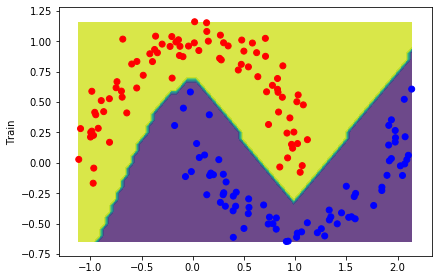

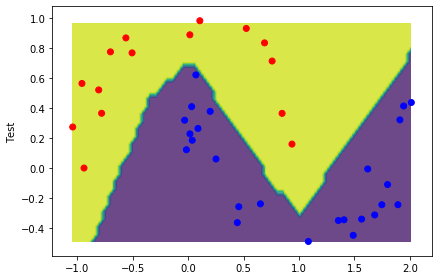

In [21]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:

Now let's revisit the classification problem in Homework2. Build a neural network to predict the output in the banking marketing dataset. The architecture choice is up to you, but you are required to  use Dense layers only.
features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function in exercise_3.py and use the below functions to train/test your code. 

In [22]:
#Read the data
#Convert categorical variables into one-hot encodings(including the output variable consisting of "yes" or "no")

X = pd.read_excel("features_ex2.xlsx")
y = pd.read_excel("label_ex2.xlsx")
y = y.eq('yes').mul(1)

categories = ['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical = pd.get_dummies(X[categories])
continuous = X.drop(columns=categories)
X = pd.concat([continuous,categorical],axis=1)

In [23]:
#Split data into train, validation and test set (70:15:15 ratio)

X_train = X.iloc[0:3165,:]
y_train = y.iloc[0:3165,:]
X_cv = X.iloc[3165:3843,:]
y_cv = y.iloc[3165:3843,:]
X_test = X.iloc[3843:4521,:]

In [24]:
#Apply standardization to continuous values 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

continuous_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])
X_cv[continuous_variables] = scaler.transform(X_cv[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

In [25]:
from exercise_3 import build_final_model

In [26]:
model_nn = build_final_model()

In [27]:
#fit the model
model_nn.fit(X_train, y_train, epochs=1000, batch_size=25, verbose=0)
y_pred_cv = model_nn.predict_classes(X_cv)

Accuracy: 0.8643067846607669
Precision: 0.3387096774193548
Recall: 0.2916666666666667


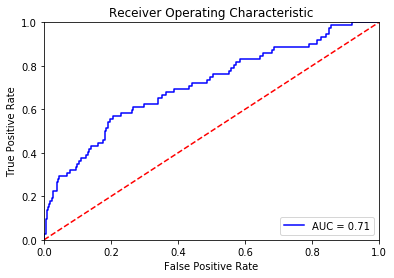

In [28]:
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:",accuracy_score(y_cv, y_pred_cv))
print("Precision:",precision_score(y_cv, y_pred_cv))
print("Recall:",recall_score(y_cv, y_pred_cv))

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probs_cv = model_nn.predict_proba(X_cv)
preds_cv = probs_cv[:,1]
fpr, tpr, threshold = roc_curve(y_cv, preds_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models.

In [29]:
from exercise_3 import logistic_regression_model

In [30]:
model_lr = logistic_regression_model()

Accuracy: 0.8908554572271387
Precision: 0.45
Recall: 0.125


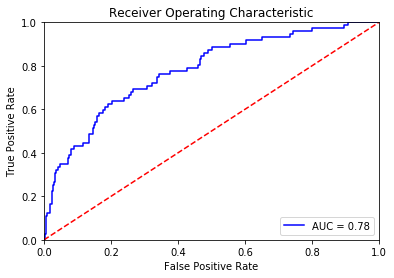

In [31]:
#fit the model
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
model_lr.fit(X_train, np.ravel(y_train))
y_cv_pred = model_lr.predict(X_cv)

from classification_utils import accuracy, precision, recall
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_cv_arr = np.array(y_cv)
y_cv_pred_arr = np.array(y_cv_pred)

print("Accuracy:",metrics.accuracy_score(y_cv_arr, y_cv_pred_arr))
print("Precision:",metrics.precision_score(y_cv_arr, y_cv_pred_arr))
print("Recall:",metrics.recall_score(y_cv_arr, y_cv_pred_arr))

probs = model_lr.predict_proba(X_cv)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_cv_arr, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
from exercise_3 import random_forest_model

In [33]:
model_rf = random_forest_model()

In [34]:
#fit the model
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=26, verbose=0,
                       warm_start=False)

Accuracy: 0.8982300884955752
Precision: 0.6363636363636364
Recall: 0.09722222222222222


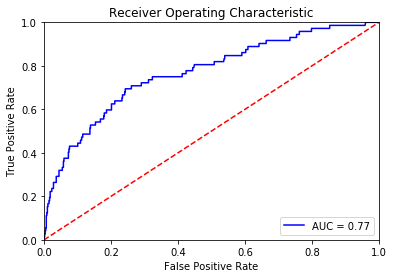

In [35]:
#obtain predictions on validation set and compute accuracy,precision,recall and plot ROC curve with AOC
y_pred_cv = model_rf.predict(X_cv)

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print("Accuracy:",accuracy_score(y_cv, y_pred_cv))
print("Precision:",precision_score(y_cv, y_pred_cv))
print("Recall:",recall_score(y_cv, y_pred_cv))

probs_cv = model_rf.predict_proba(X_cv)
preds_cv = probs_cv[:,1]
fpr, tpr, threshold = roc_curve(y_cv, preds_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Which of the above 3 models worked best for you? Explain the reason for good/bad performance for each of the models.

Among the 3 models, the best model that worked best for us is the logistic regression model. 
The dataset is very small in the case and in order to classify them it would be better to use logistic regression. This is also because of ease of implmentation and it gives superior more AUC and accuracy as shown above. 

For Neural Networks model, the accuracy is 0.88, the precision is 0.4 and the recall is 0.25. The AUC for the model is 0.69. The neural networks has the ability to learn and train non-linear and complex relationships and thus they become advantageous in training model with lot of data and attributes.

For Logistic Regression, the accuracy is  0.89, the precision is 0.45 and the recall is 0.125. The AUC is 0.78. Logistic regression works for dataset which are simplier and doesn't involve a lot of complexity in the data. Like in this particular case.

For Random Forest, the accuracy is 0.89, the precision is 0.5 and the recall is 0.16.  The AUC for the model is 0.68. Random forest has the tendency to reduce variance at the cost of increasing the bias but in doing so, it can overfit the model. Thus, using Random forest can be advantageous sometimes but on in this case.

Using the best of the above 3 models, obtain predictions for the test set. Submit these predictions in a csv. 

In [36]:
y_pred_test = model_lr.predict(X_test)

In [37]:
predicted_df = pd.DataFrame(y_pred_test, columns = ["y"])
predicted_df.index = np.arange(1,len(predicted_df)+1)
pd.DataFrame(predicted_df).to_csv("prediction_homework4.csv")